## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [ ]:
df_train=pd.read_csv('application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.shape

(307511, 122)

In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
df_test=pd.read_csv('application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [ ]:
df_test.shape

(48744, 121)

In [ ]:
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


# Exploratory Data Analysis

## Visualization

Text(0.5, 1.0, 'Percentage of Client with Payment Difficulties')

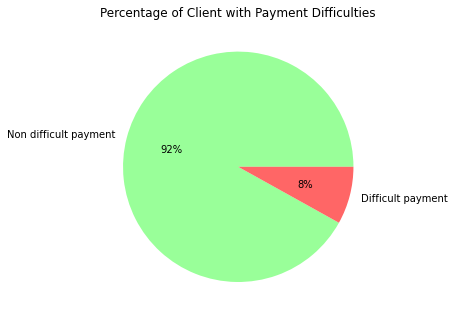

In [ ]:

fig=plt.figure(0)   
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non difficult payment','Difficult payment']
colors = ['#99ff99', '#ff6666']
churn = df_train['TARGET'].value_counts()
ax.pie(churn, labels=labels, colors=colors, autopct='%.0f%%')
ax.set_title('Percentage of Client with Payment Difficulties')

Text(0.5, 1.0, 'Target features')

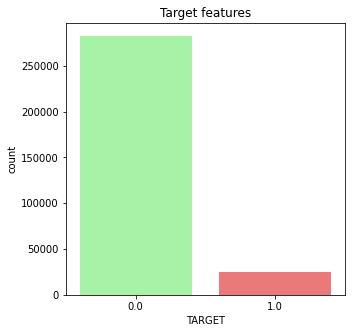

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_train['TARGET'], palette=['#99ff99', '#ff6666'])
plt.title('Target features')

## Missing Value Detection

In [ ]:
missing_value = df_train.isnull().sum().sort_values()
missing_value

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [ ]:
miss = missing_value[missing_value < 5000].index.to_list()

In [ ]:
missing_value [missing_value > 5000]

AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
EXT_SOURCE_3                     60965
OCCUPATION_TYPE                  96391
EMERGENCYSTATE_MODE             145755
TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
HOUSETYPE_MODE                  154297
LIVINGAREA_AVG                  154350
LIVINGAREA_MODE                 154350
LIVINGAREA_MEDI                 154350
ENTRANCES_AVG                   154828
ENTRANCES_MODE                  154828
ENTRANCES_MEDI                  154828
APARTMENTS_MEDI                 156061
APARTMENTS_AVG                  156061
APARTMENTS_MODE          

In [ ]:
df_train_drop = df_train.dropna(subset = miss)

In [ ]:
df_train_drop.shape[0]
df_train.shape[0]

307511

In [ ]:
total_drop = df_train.shape[0] - df_train_drop.shape[0]
persentase_drop = (total_drop / df_train.shape[0]) * 100
print(f'Total of dropping rows are: {total_drop}')
print(f'Percent of dropping rows {persentase_drop:.2f}% from dataset')

Total of dropping rows are: 2980
Percent of dropping rows 0.97% from dataset


In [ ]:
nums = [key for key in dict(df_train.dtypes) if dict(df_train.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(df_train.dtypes) if dict(df_train.dtypes)[key] in ['object']]

In [ ]:
#create two DataFrames, one for each data type
data_num = df_train[nums]
data_cat = pd.DataFrame(df_train[cats])

from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)
data_num = pd.DataFrame(num_imp.fit_transform(data_num), columns = data_num.columns) #only apply imputer to numeric columns

cat_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
data_cat = pd.DataFrame(cat_imp.fit_transform(data_cat), columns = data_cat.columns) #only apply imputer to categoric columns

#join the two masked dataframes back together
df_train = pd.concat([data_num, data_cat], axis = 1)

In [ ]:
df_train.isna().sum()

SK_ID_CURR             0
TARGET                 0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
                      ..
ORGANIZATION_TYPE      0
FONDKAPREMONT_MODE     0
HOUSETYPE_MODE         0
WALLSMATERIAL_MODE     0
EMERGENCYSTATE_MODE    0
Length: 122, dtype: int64

## Duplicate Value Detection

In [ ]:
df_train.duplicated().sum()

0

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.preprocessing import LabelEncoder
from numpy import array 

In [ ]:
df_model = df_train

In [ ]:
cats_le = df_model[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                        'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE',
                        'NAME_EDUCATION_TYPE']]
cats_ohe = df_model[['NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                         'NAME_FAMILY_STATUS','OCCUPATION_TYPE',
                         'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',
                         'WALLSMATERIAL_MODE','HOUSETYPE_MODE',
                         'NAME_HOUSING_TYPE']]

In [ ]:
for i in cats_le:
    df_model[i]= LabelEncoder().fit_transform(df_model[i])
for cat in cats_ohe:
    onehots = pd.get_dummies(df_model[cat], prefix=cat)
    df_model = df_model.join(onehots)

In [ ]:
df_model = df_train.drop(['FONDKAPREMONT_MODE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','NAME_HOUSING_TYPE'], axis=1)

In [ ]:
df_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 112 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    float64
 1    TARGET                        float64
 2    CNT_CHILDREN                  float64
 3    AMT_INCOME_TOTAL              float64
 4    AMT_CREDIT                    float64
 5    AMT_ANNUITY                   float64
 6    AMT_GOODS_PRICE               float64
 7    REGION_POPULATION_RELATIVE    float64
 8    DAYS_BIRTH                    float64
 9    DAYS_EMPLOYED                 float64
 10   DAYS_REGISTRATION             float64
 11   DAYS_ID_PUBLISH               float64
 12   OWN_CAR_AGE                   float64
 13   FLAG_MOBIL                    float64
 14   FLAG_EMP_PHONE                float64
 15   FLAG_WORK_PHONE               float64
 16   FLAG_CONT_MOBILE              float64
 17   FLAG_PHONE                    float64
 18   FL

In [ ]:
X_fs = df_model[[col for col in df_model.columns if col not in ['TARGET']]]
y_fs = df_model['TARGET']
 
print("Feature data dimension: ", X_fs.shape) 

Feature data dimension:  (307511, 111)


In [ ]:
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(X_fs, y_fs) 
 
print("After selecting best 10 features:", z.shape) 

After selecting best 10 features: (307511, 10)


In [ ]:
filter = select.get_support()
features = array(X_fs.columns)
 
print("Selected best 10:")
print(' ')
print(features[filter])
print(z) 

Selected best 10:
 
['DAYS_BIRTH' 'DAYS_ID_PUBLISH' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'EXT_SOURCE_1' 'EXT_SOURCE_2'
 'EXT_SOURCE_3' 'DAYS_LAST_PHONE_CHANGE' 'CODE_GENDER'
 'NAME_EDUCATION_TYPE']
[[-9.4610e+03 -2.1200e+03  2.0000e+00 ... -1.1340e+03  1.0000e+00
   4.0000e+00]
 [-1.6765e+04 -2.9100e+02  1.0000e+00 ... -8.2800e+02  0.0000e+00
   1.0000e+00]
 [-1.9046e+04 -2.5310e+03  2.0000e+00 ... -8.1500e+02  1.0000e+00
   4.0000e+00]
 ...
 [-1.4966e+04 -5.1500e+03  3.0000e+00 ... -1.9090e+03  0.0000e+00
   1.0000e+00]
 [-1.1961e+04 -9.3100e+02  2.0000e+00 ... -3.2200e+02  0.0000e+00
   4.0000e+00]
 [-1.6856e+04 -4.1000e+02  1.0000e+00 ... -7.8700e+02  0.0000e+00
   1.0000e+00]]


In [ ]:
correlation = df_model.corr()

In [ ]:
correlation['TARGET'].sort_values().tail(10)

FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER                    0.054692
NAME_EDUCATION_TYPE            0.054699
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [ ]:
correlation['TARGET'].sort_values().head(10)

EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_1                 -0.098887
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039623
FLOORSMAX_AVG                -0.039385
FLOORSMAX_MEDI               -0.039157
FLOORSMAX_MODE               -0.038377
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.035853
Name: TARGET, dtype: float64

In [ ]:
selection = ['DAYS_BIRTH',
        'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY',
        'EXT_SOURCE_1',
        'EXT_SOURCE_2', 
        'EXT_SOURCE_3',
        'DAYS_LAST_PHONE_CHANGE',
        'CODE_GENDER',
        'REG_CITY_NOT_WORK_CITY',
        'DAYS_ID_PUBLISH',
        'NAME_EDUCATION_TYPE',
        'FLAG_EMP_PHONE',
        'ELEVATORS_AVG',       
        'DAYS_EMPLOYED',                
        'AMT_GOODS_PRICE',             
        'FLOORSMAX_AVG',                
        'FLOORSMAX_MEDI',               
        'FLOORSMAX_MODE',
        'TARGET'               
       ]

In [ ]:
df_selection=df_model[selection]

In [ ]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DAYS_BIRTH                   307511 non-null  float64
 1   REGION_RATING_CLIENT         307511 non-null  float64
 2   REGION_RATING_CLIENT_W_CITY  307511 non-null  float64
 3   EXT_SOURCE_1                 307511 non-null  float64
 4   EXT_SOURCE_2                 307511 non-null  float64
 5   EXT_SOURCE_3                 307511 non-null  float64
 6   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 7   CODE_GENDER                  307511 non-null  int64  
 8   REG_CITY_NOT_WORK_CITY       307511 non-null  float64
 9   DAYS_ID_PUBLISH              307511 non-null  float64
 10  NAME_EDUCATION_TYPE          307511 non-null  int64  
 11  FLAG_EMP_PHONE               307511 non-null  float64
 12  ELEVATORS_AVG                307511 non-null  float64
 13 

## Univariate Analysis

In [ ]:
cat = []
num = []

for col in df_selection.columns:
    if df_selection[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

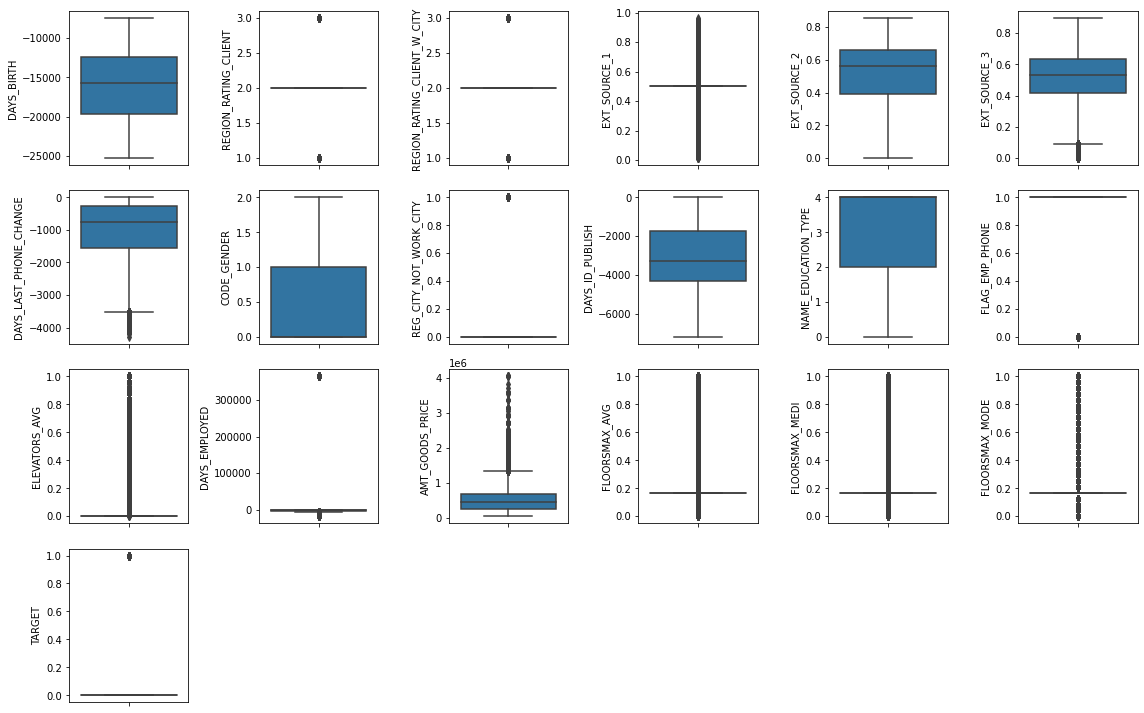

In [ ]:
plt.figure(figsize = (16,10))
for i in range(len(num)):
    plt.subplot(4, round(len(num)/3), i+1)
    sns.boxplot(y = df_model[num[i]], orient = 'v')
    plt.tight_layout()

In [ ]:
df_selection.columns

Index(['DAYS_BIRTH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'REG_CITY_NOT_WORK_CITY',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE', 'FLAG_EMP_PHONE',
       'ELEVATORS_AVG', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'TARGET'],
      dtype='object')

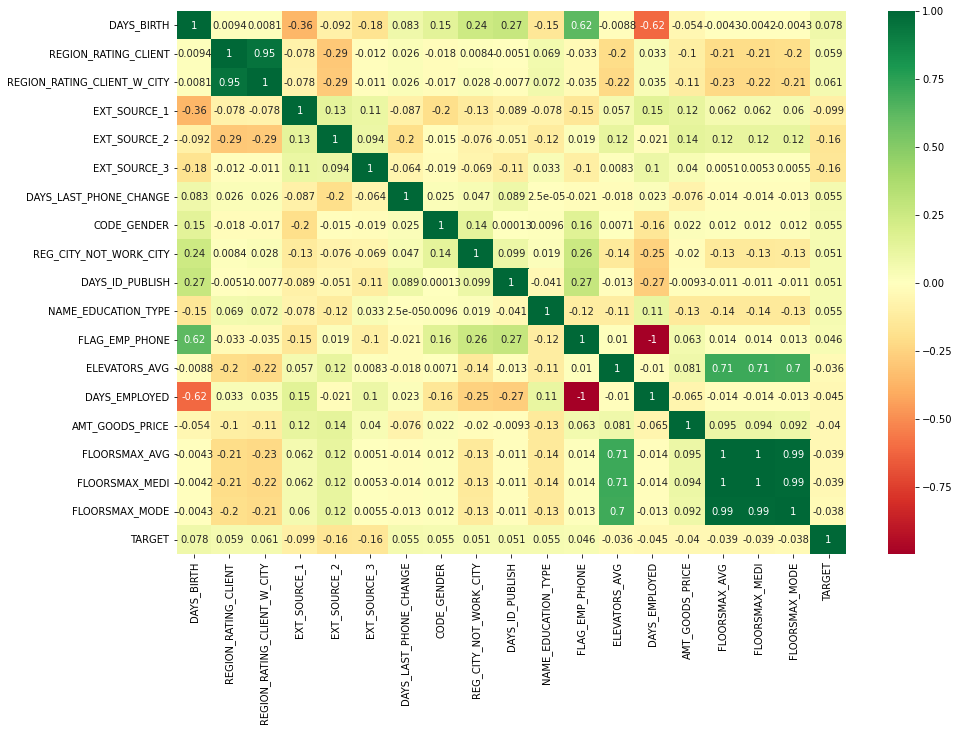

In [ ]:
corr = df_selection.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax)

In [ ]:
df_selection.drop(columns=['REGION_RATING_CLIENT','DAYS_EMPLOYED','FLOORSMAX_MEDI','FLOORSMAX_MODE'],inplace = True)

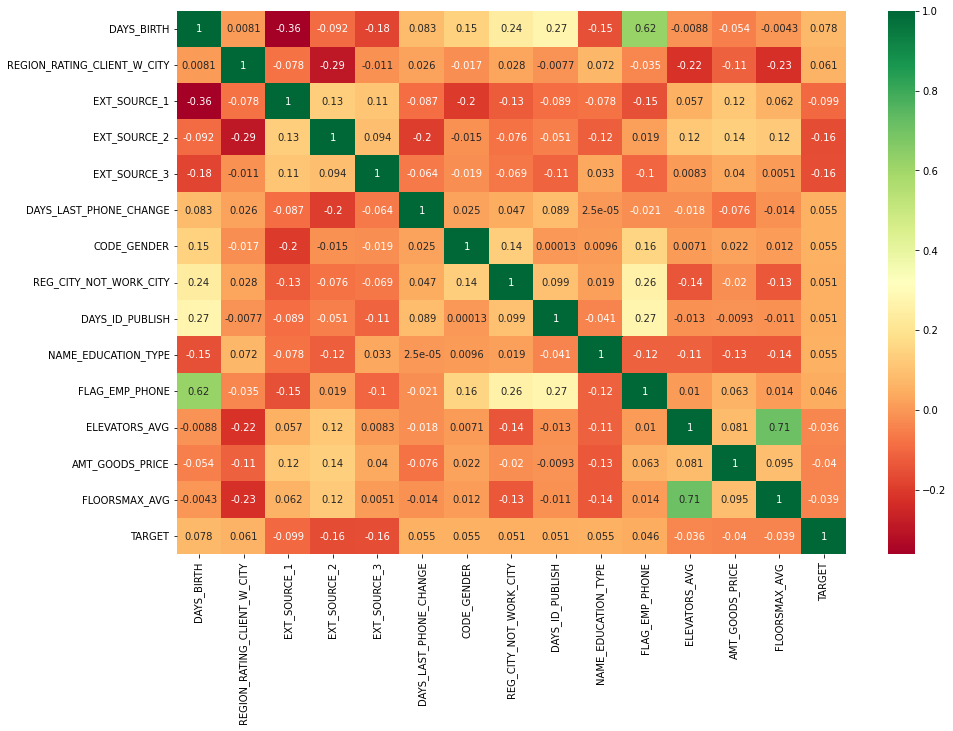

In [ ]:
corr = df_selection.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax)

In [ ]:
df_selection.drop(columns=['FLAG_EMP_PHONE','ELEVATORS_AVG'],inplace = True)

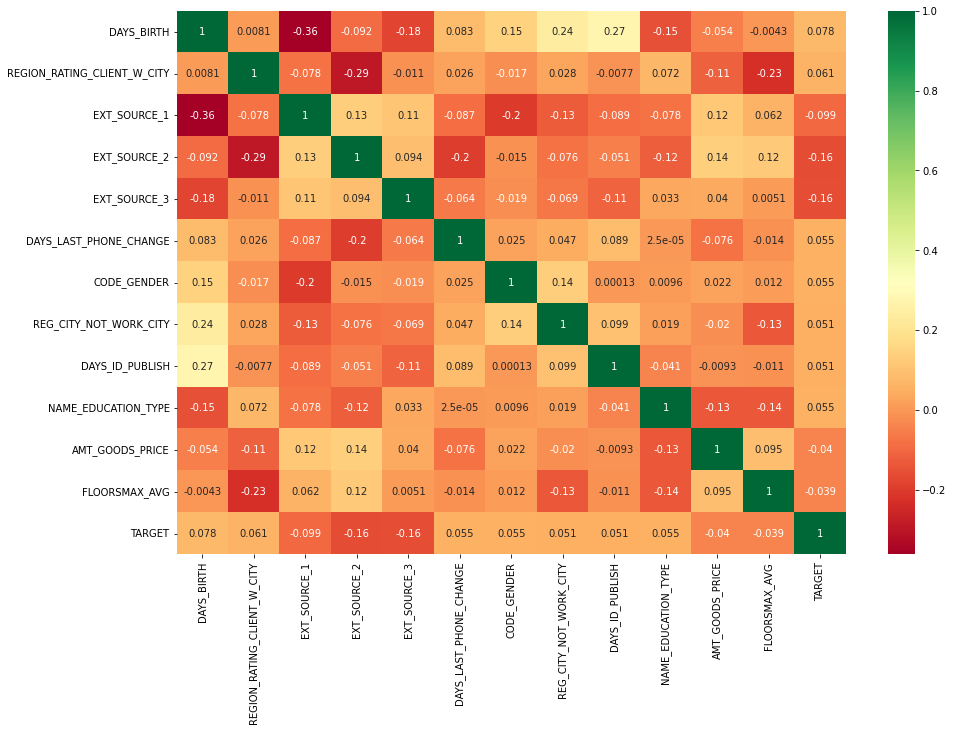

In [ ]:
corr = df_selection.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax)

In [ ]:
df_selection.columns

Index(['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE',
       'AMT_GOODS_PRICE', 'FLOORSMAX_AVG', 'TARGET'],
      dtype='object')

## Handling Outlier

In [ ]:
#Outlier
from scipy import stats
print(f'Jumlah sebelum outlier difilter :{len(df_selection)}')
clear_outlier = np.array([True]* len(df_selection))
for col in ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE',
       'AMT_GOODS_PRICE', 'FLOORSMAX_AVG']:
  zscore = abs(stats.zscore(df_selection[col]))
  clear_outlier = (zscore < 3 ) & clear_outlier

df_clear_outlier = df_selection[clear_outlier]
print(f'Jumlah baris setelah memfilter : {len(df_clear_outlier)}')

Jumlah sebelum outlier difilter :307511
Jumlah baris setelah memfilter : 294365


In [ ]:
df_pre = df_clear_outlier

## Oversampling

In [ ]:
X = df_pre.drop('TARGET', axis = 1)
y = df_pre['TARGET']

In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(294365, 12)
Shape of X after SMOTE:(540848, 12) 


Target Class distributuion before SMOTE:
0.0    0.918669
1.0    0.081331
Name: TARGET, dtype: float64
Target Class distributuion after SMOTE :
0.0    0.5
1.0    0.5
Name: TARGET, dtype: float64


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = 0.3,
    random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((378593, 12), (378593,), (162255, 12), (162255,))

## Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Logistic Regression

Accuracy Logistic Regression: 0.685
Precision Logistic Regression : 0.685
Recall Logistic Regression: 0.685
F1-score Logistic Regression : 0.685


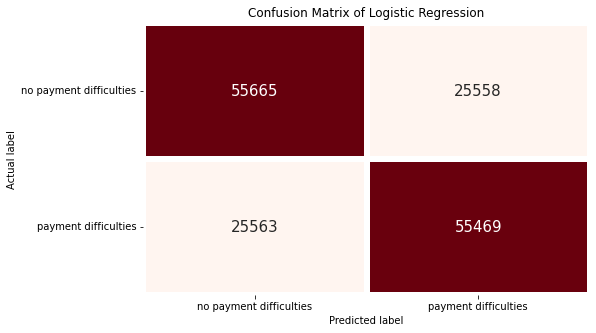

In [ ]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=10)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
accuracy_logreg=round(accuracy_score(y_test,Y_pred), 3)
precision_logreg = round(precision_score(y_test , Y_pred) , 3)
recall_logreg = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
lr_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy Logistic Regression:', accuracy_logreg)
print('Precision Logistic Regression :', precision_logreg) 
print('Recall Logistic Regression:', recall_logreg)
print('F1-score Logistic Regression :', f1)

plt.figure(figsize = (8, 5))
sns.heatmap(lr_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['no payment difficulties', 'payment difficulties'], xticklabels = ['no payment difficulties', 'payment difficulties'])
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

### Random Forest

Accuracy Random Forest: 0.901
Precision Random Forest : 0.94
Recall Random Forest: 0.857
F1-score Random Forest : 0.897


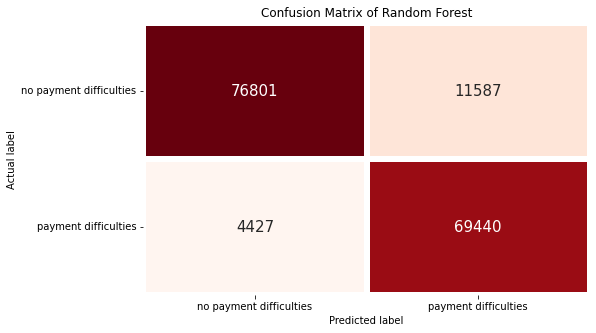

In [ ]:
rf= RandomForestClassifier(10)
rf.fit(X_train, y_train)
np.random.seed(42)

Y_pred = rf.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_pred), 3)
precision_rf = round(precision_score(y_test , Y_pred) , 3)
recall_rf = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
rf_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy Random Forest:', accuracy_rf)
print('Precision Random Forest :', precision_rf) 
print('Recall Random Forest:', recall_rf)
print('F1-score Random Forest :', f1)

# Visualisasi confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['no payment difficulties', 'payment difficulties'], xticklabels = ['no payment difficulties', 'payment difficulties'])
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

### Decision Tree

Accuracy Decision Tree: 0.857
Precision Decision Tree : 0.846
Recall Decision Tree: 0.872
F1-score Decision Tree : 0.859


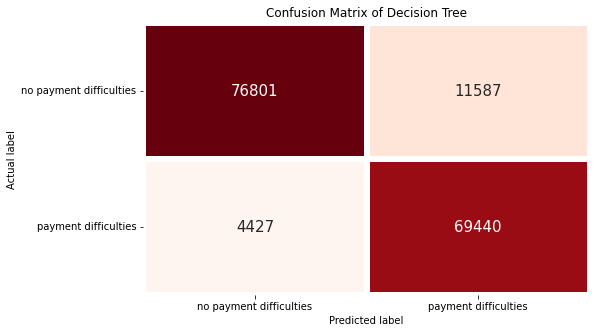

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

Y_pred = dt.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,Y_pred), 3)
precision_dt = round(precision_score(y_test , Y_pred) , 3)
recall_dt = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
dt_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy Decision Tree:', accuracy_dt)
print('Precision Decision Tree :', precision_dt) 
print('Recall Decision Tree:', recall_dt)
print('F1-score Decision Tree :', f1)

# Visualisasi confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['no payment difficulties', 'payment difficulties'], xticklabels = ['no payment difficulties', 'payment difficulties'])
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

## Model Evaluation


In [ ]:
results = pd.DataFrame([["Logistic Regression",accuracy_logreg,precision_logreg,recall_logreg],
                        ["Random Forest",accuracy_rf,precision_rf,recall_rf],
                       ["Decision Tree", accuracy_dt,precision_dt,recall_dt]],
columns = ["Models","Accuracy Score","Precision Score", "Recall Score"]).sort_values(by='Accuracy Score',ascending=False)


results.style.background_gradient(cmap='Reds')

,Models,Accuracy Score,Precision Score,Recall Score
1,Random Forest,0.901000,0.940000,0.857000
2,Decision Tree,0.857000,0.846000,0.872000
0,Logistic Regression,0.685000,0.685000,0.685000


# Submiting Prediction

In [ ]:
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[1. 0. 0. ... 0. 0. 0.]


In [ ]:
pd.Series
result = pd.Series(y_pred_rf)
result

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
162250    1.0
162251    0.0
162252    0.0
162253    0.0
162254    0.0
Length: 162255, dtype: float64

In [ ]:
result_df = pd.DataFrame()

In [ ]:
result_df['TARGET']= list(result)
result_df.head()

,TARGET
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
result_df['TARGET'].value_counts()

0.0    88388
1.0    73867
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Percentage of Client with Payment Difficulties')

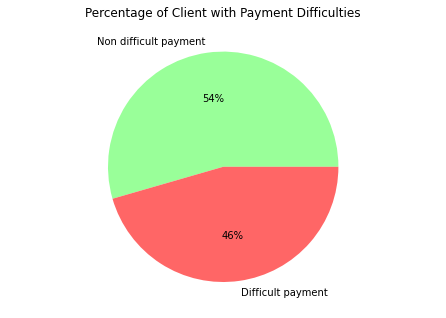

In [ ]:

fig=plt.figure(0)   
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non difficult payment','Difficult payment']
colors = ['#99ff99', '#ff6666']
churn = result_df['TARGET'].value_counts()
ax.pie(churn, labels=labels, colors=colors, autopct='%.0f%%')
ax.set_title('Percentage of Client with Payment Difficulties')

In [ ]:
result_df.to_csv('result.csv', index = False)